# 32 Finding Similar Companies with Nearest Neighbors

* Top 500 US companies dataset

This notebook shows a basic process:

* taking a public data set (from http://www.opendata500.com/us/list/)
* inspection
* cleaning
* converting features to categorical variables
* test a nearest neighbor search to find similar companies
* adjusting the data used for queries

This data set is relatively small and does not include financials, just business domain, company size and customer types.

## Basic inspections

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

```
!head -2 us_companies.csv
```

> company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010,Washington,DC,us,20004,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing, Subscriptions","Business to Business, Business to Consumer",,"3 Round Stones produces a platform for publishing data on the Web. 3 Round Stones provides commercial support for the Callimachus Data Platform, used by the Fortune 2000 and US Government Agencies publishing and consuming data.  Headquartered in Arlington, Virginia, we're seasoned entrepreneurs who are passionate about solving real world problems through open data and open Web standards.","Our Open Source platform is used by the Fortune2000 and US Government Agencies to collect, publish and reuse data, both public and proprietary.",NA,,,[],"3 Round Stones is a profitable, self-funded, woman-owned start-up.  Our team has several successful serial entrepreneurs.  As entrepreneurs, we've benefited from the valuable guidance by seasoned advisers and mentors in the mid-Atlantic region who have guided our team through multiple start-ups, outside funding and an acquisition by a Fortune 100 company in 2005.",2014-11-12 14:44:25.969871

In [2]:
df = pd.read_csv("data/us_companies.csv", sep=",")

In [3]:
df.head()

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name_id      529 non-null    object 
 1   company_name         529 non-null    object 
 2   url                  529 non-null    object 
 3   year_founded         528 non-null    float64
 4   city                 496 non-null    object 
 5   state                529 non-null    object 
 6   country              529 non-null    object 
 7   zip_code             492 non-null    float64
 8   full_time_employees  500 non-null    object 
 9   company_type         513 non-null    object 
 10  company_category     526 non-null    object 
 11  revenue_source       519 non-null    object 
 12  business_model       453 non-null    object 
 13  social_impact        16 non-null     object 
 14  description          529 non-null    object 
 15  description_short    529 non-null    obj

In [5]:
df[df.year_founded.isnull()]

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
291,marlin-alter-and-associates,Marlin Alter and Associates,http://www.marlinalter.com/,NaN,NaN,FL,us,NaN,NaN,NaN,...,NaN,NaN,"Marlin, Alter & Associates provides background...","Marlin, Alter & Associates provides background...",101+,NaN,NaN,[],NaN,2014-10-23 14:36:57.718144


Drop the one company, that has no founding year.

In [6]:
df = df.dropna(subset=["year_founded"])

Convert years to integers.

In [7]:
df["year_founded"] = df["year_founded"].astype(int)

### Distribution of founding years

<Axes: ylabel='Frequency'>

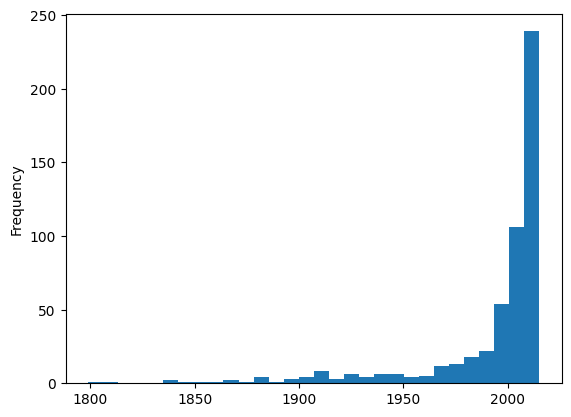

In [8]:
df.year_founded.plot(kind="hist", bins=30)

28 companies have missing values for number of employees.

In [9]:
len(df[df.full_time_employees.isnull()])

28

8 categories of company sizes.

In [10]:
df.groupby("full_time_employees").size().sort_values(ascending=False)

full_time_employees
1-10            143
11-50           115
51-200           93
10,001+          56
1,001-5,000      30
201-500          25
501-1,000        22
5,001-10,000     16
dtype: int64

In [11]:
pd.get_dummies(df["full_time_employees"]).head()

,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200
0,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False


In [12]:
df = pd.concat([df, pd.get_dummies(df["full_time_employees"])], sort=False, axis=1)

Mostly private, some public and non-profit companies.

In [13]:
df.groupby("company_type").size().sort_values(ascending=False)

company_type
Private                           396
Public                             92
Nonprofit                          15
partnership                         4
Partnership                         2
Permitting Assistance               1
Public (Federal-USGS)               1
nonprofit + commercial spinoff      1
sole proprietorship                 1
dtype: int64

In [14]:
df.loc[df.company_type == "partnership", "company_type"] = "Partnership"
df.loc[df.company_type == "sole proprietorship", "company_type"] = "Private"
df.loc[df.company_type == "nonprofit + commercial spinoff", "company_type"] = "Nonprofit"
df.loc[df.company_type == "Public (Federal-USGS)", "company_type"] = "Public"
df.loc[df.company_type == "Permitting Assistance", "company_type"] = "Private"

In [15]:
df.groupby("company_type").size().sort_values(ascending=False)

company_type
Private        398
Public          93
Nonprofit       16
Partnership      6
dtype: int64

In [16]:
df = pd.concat([df, pd.get_dummies(df["company_type"])], sort=False, axis=1)

Lots of missing revenue source entries.

In [17]:
df.groupby("revenue_source").size().sort_values(ascending=False).index.tolist()[:10]

['Not reported by company',
 'Software licensing',
 'not reported by company',
 'Data analysis for clients, Database licensing',
 'Subscriptions',
 'Not provided by company',
 'Data analysis for clients, Database licensing, Subscriptions',
 'Subscriptions, User fees for web or mobile access',
 'Software licensing, Subscriptions',
 'Advertising']

In [18]:
df.groupby("business_model").size().sort_values(ascending=False).index.tolist()

['Business to Business',
 'Business to Consumer',
 'Business to Business, Business to Consumer',
 'Business to Business, Business to Government',
 'Business to Business, Business to Consumer, Business to Government',
 'Business to Government',
 'Business to Consumer, Business to Government',
 'Business to Government, nonprofit',
 'Business to Business, academia',
 'nonprofit',
 'Business to Business, Business to Government, academia',
 'Business to Business, Business to Government, nonprofit',
 'Business to Business, nonprofit',
 'Business to Business, Business to Consumer, Business to Government, academia',
 'Business to Government, ',
 'academia',
 'Nonprofit',
 'Business to Business, Business to Consumer, ',
 'Business to Government, academia + nonprofit',
 'Business to Government, Business to Nonprofit',
 'Business to Business, Business to Consumer, nonprofit',
 'Business to Business, Business to Consumer, Business to Government, ',
 'Business to Consumer, Business to Government, n

### Heavy data cleaning

Try to parse out the categories.

* create a list of values, splitted on "," (comma)
* create a set out of these values
* create a mapping from values in DataFrame to normalized values

In [39]:
bm_dirty = df["business_model"].str.split(",").apply(pd.Series).values.ravel().tolist()
entries = list(set([str(val).strip() for val in bm_dirty]))
mapping = dict(zip(entries, ["NA", "B2C", "B2B", "NP", "B2G", "B2NP", "NA", "AC", "NP", "NP"]))

In [40]:
mapping

{'': 'NA',
 'Business to Consumer': 'B2C',
 'Business to Business': 'B2B',
 'academia + nonprofit': 'NP',
 'Business to Government': 'B2G',
 'Business to Nonprofit': 'B2NP',
 'nan': 'NA',
 'academia': 'AC',
 'nonprofit': 'NP',
 'Nonprofit': 'NP'}

In [41]:
for key in sorted(set(mapping.values())):
    df.loc[:, key] = 0
    
for i, row in df.iterrows():
    for value in str(row["business_model"]).split(","):
        df.loc[i, mapping[value.strip()]] = 1

In [42]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated',
       '1,001-5,000', '1-10', '10,001+', '11-50', '201-500', '5,001-10,000',
       '501-1,000', '51-200', 'Nonprofit', 'Partnership', 'Private', 'Public',
       'AC', 'B2B', 'B2C', 'B2G', 'B2NP', 'NA', 'NP'],
      dtype='object')

### Convert to categorical variables

In [43]:
df.loc[:, "B2B":][:10]

,B2B,B2C,B2G,B2NP,NA,NP
0,1,1,0,0,0,0
1,1,0,0,0,0,0
2,1,1,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
5,1,0,0,0,0,0
6,1,1,1,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,0,0,1,0,0,0


In [44]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated',
       '1,001-5,000', '1-10', '10,001+', '11-50', '201-500', '5,001-10,000',
       '501-1,000', '51-200', 'Nonprofit', 'Partnership', 'Private', 'Public',
       'AC', 'B2B', 'B2C', 'B2G', 'B2NP', 'NA', 'NP'],
      dtype='object')

In [45]:
df.groupby("company_category").size().sort_values(ascending=False)

company_category
Data/Technology              97
Finance & Investment         75
Governance                   43
Business & Legal Services    43
Healthcare                   40
Geospatial/Mapping           30
Research & Consulting        28
Transportation               28
Energy                       28
Lifestyle & Consumer         25
Housing/Real Estate          20
Education                    19
Scientific Research          17
Environment & Weather        11
Insurance                    11
Food & Agriculture            6
Housing/Real Estate,          1
Media                         1
Data/Technology,              1
Aerospace and Defense         1
dtype: int64

In [46]:
pd.get_dummies(df["company_category"]).head()

,Aerospace and Defense,Business & Legal Services,Data/Technology,"Data/Technology,",Education,Energy,Environment & Weather,Finance & Investment,Food & Agriculture,Geospatial/Mapping,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [47]:
df = pd.concat([df, pd.get_dummies(df["company_category"])], sort=False, axis=1)

In [48]:
df = df.drop(["url", "company_name", "city", "state", "country", "zip_code", "full_time_employees",
              "company_type", "company_category", "revenue_source", "business_model", "social_impact",
              "description", "description_short", "source_count", "data_types", "last_updated",
              "financial_info", "example_uses", "data_impacts"], axis=1)

In [49]:
df

,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
0,3-round-stones-inc,2010,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,48-factoring-inc,2014,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,5psolutions,2007,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,abt-associates,1965,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,accela,1999,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,zillow,2006,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
525,zocdoc,2007,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
526,zonability,2003,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
527,zoner,2011,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Exploring NearestNeighbors

In [50]:
from sklearn.neighbors import NearestNeighbors

In [68]:
X = df.loc[:, "1,001-5,000":]

In [69]:
X.shape

(528, 39)

In [70]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)

In [74]:
query = df[df["company_name_id"] == "accela"].loc[:, "1,001-5,000":]

In [75]:
query

,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,Nonprofit,Partnership,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [76]:
distances, indices = nbrs.kneighbors(query.values)

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [77]:
indices

array([[  4, 156,  72,  35,  32]])

In [78]:
df.iloc[indices[0]]

,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
4,accela,1999,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
156,everyday-health,2002,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
72,carfax,1984,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
35,avalara,2004,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
32,aunt-bertha-inc,2010,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [79]:
def similar_companies(company_name_id, k=5):
    """
    Given a company name id (e.g. "arpin-van-lines")
    return k most similar companies via KNN.
    """
    query = df[df["company_name_id"] == company_name_id].loc[:, "1,001-5,000":]
    _, indices = nbrs.kneighbors(query.values)
    return df.iloc[indices[0]]

In [80]:
similar_companies("yahoo")

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
520,yahoo,1994,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
509,weight-watchers,1960,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
208,harris-corporation,1895,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
388,r-r-donnelley,1864,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221,ibm,1912,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
similar_companies("wolfram-research")

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
425,smartronix,1995,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
513,wolfram-research,1987,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
400,rei-systems,1989,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
120,crowdanalytix,2012,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
178,fujitsu,1935,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [135]:
similar_companies("ibm") # "ibm","amazon-web-services", "wolfram-research", "bloomberg", "blackrock", "sap"

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
221,ibm,1912,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
461,teradata,1979,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,amazon-web-services,2007,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,canon,1937,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47,bing,2009,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
import random
random.sample(df.company_name_id.unique().tolist(), k=100)

['socialeffort-inc',
 'nextbus',
 'socrata',
 'intelius',
 'loqate-inc',
 'walk-score',
 'topcoder',
 'simpletuition',
 'civic-insight',
 'opengov',
 'quandl',
 '5psolutions',
 'collective-ip',
 'first-fuel-software',
 'sigfig',
 'xdayta',
 'jp-morgan-chase',
 'clearhealthcosts',
 'practice-fusion',
 'ranku',
 'webfilings',
 'opportunityspace-inc',
 'corelogic',
 'farmlogs',
 'compliance-and-risks',
 'accela',
 'roadify-transit',
 'synthicity',
 'iphix',
 'kaiser-permanante',
 'way-better-patents',
 'github',
 'boundless',
 'trustedid',
 'imedicare',
 'the-docgraph-journal',
 'osisoft',
 'otc-markets',
 'civinomics',
 'loopnet',
 'flightview',
 'boston-consulting-group',
 'level-one-technologies',
 'inrix-traffic',
 'parsons-brinckerhoff',
 'transunion',
 'the-vanguard-group',
 'think-computer-corporation',
 'abt-associates',
 'emc',
 'impaq-international',
 'mckinsey',
 'seeclickfix',
 'rapid-cycle-solutions',
 'teradata',
 'vitals',
 'openplans',
 'north-american-van-lines',
 'exvers

### Adjusting the algorithm

> Algorithm places emphasis on founding year.

Another version, where we only look at company size, business domain and costomer types.

In [137]:
X = df.loc[:, "1,001-5,000":]
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)

def similar_companies(company_name_id, k=5):
    """
    Given a company name id (e.g. "arpin-van-lines")
    return k most similar companies via KNN.
    """
    query = df[df["company_name_id"] == company_name_id].loc[:, "1,001-5,000":]
    _, indices = nbrs.kneighbors(query.values)
    return df.iloc[indices[0]]

In [138]:
similar_companies("wolfram-research")

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
425,smartronix,1995,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
513,wolfram-research,1987,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
400,rei-systems,1989,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
120,crowdanalytix,2012,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
178,fujitsu,1935,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
similar_companies("yahoo")

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
520,yahoo,1994,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
509,weight-watchers,1960,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
208,harris-corporation,1895,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
388,r-r-donnelley,1864,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221,ibm,1912,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
similar_companies("weather-underground")

/home/tir/code/miku/pythonpath/.venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,company_name_id,year_founded,"1,001-5,000",1-10,"10,001+",11-50,201-500,"5,001-10,000","501-1,000",51-200,...,Governance,Healthcare,Housing/Real Estate,"Housing/Real Estate,",Insurance,Lifestyle & Consumer,Media,Research & Consulting,Scientific Research,Transportation
505,weather-underground,1995,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
147,environmental-data-resources,1990,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
504,weather-decision-technologies,1999,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
134,earth-networks,1993,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
76,ceiba-solutions,2006,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
